In [1]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import EfficientNetB2
# from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
model = load_model('mobilenetV2_softmax_GM_rescale.h5')

In [3]:
path = '../video/3.avi'
cap = cv2.VideoCapture(path)
frame_array =[]
while(True):
    ret,frame = cap.read()
    # print(frame.shape)
    if not ret:
        break
    cv2.imshow('frame',frame)
    frame_resized = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    frame_resized = cv2.resize(frame_resized, (224, 224))
    frame_array.append(frame_resized)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [4]:
frame_array = np.array(frame_array)

In [5]:
frame_array.shape

(4124, 224, 224)

In [6]:
frame_array.shape


(4124, 224, 224)

In [7]:
frame_array_rgb = np.zeros((frame_array.shape[0],224,224,3))
frame_array_rgb[:,:,:,0] = frame_array
frame_array_rgb[:,:,:,1] = frame_array
frame_array_rgb[:,:,:,2] = frame_array
frame_array_rgb = frame_array_rgb/255

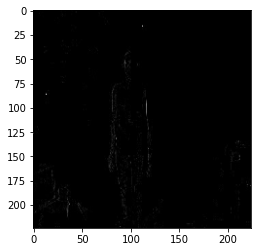

In [39]:
plt.imshow(frame_array[200],cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


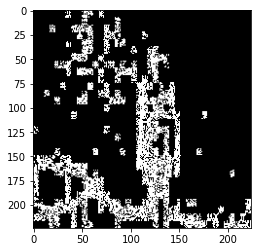

In [43]:
plt.imshow(frame_array_rgb[300]*255)